# “The dynamics of the impact of an organization’s multiple objectives on its performance over time.

Last Update: 09/29/25
Author: @georgia-max


In [6]:
# Virtual environment is already set up with all dependencies
import pysd 
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

In [30]:
pd.set_option('display.max_rows', None)      # Show all rows


In [38]:
# Load the corrected Python model (fixed random_poisson issue)
model = pysd.load("model_13_gl.py")
# model = pysd.read_vensim("model_13_gl.mdl")

# list all the rows 


model.doc
# Save model.doc to pandas table and display it
doc_df = pd.DataFrame(model.doc)
doc_df



,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Accident shock level,accident_shock_level,None,None,"(nan, nan)",Stateful,Integ,None
1,FINAL TIME,final_time,None,Month,"(nan, nan)",Constant,Normal,The final time for the simulation.
2,INITIAL TIME,initial_time,None,Month,"(nan, nan)",Constant,Normal,The initial time for the simulation.
3,Perceived comb perf,perceived_comb_perf,None,Dmnl,"(nan, nan)",Stateful,Integ,None
4,Perceived perfromance gap,perceived_perfromance_gap,[Goal],Dmnl,"(nan, nan)",Stateful,Smooth,None
5,Resources,resources,[Goal],Dollar,"(nan, nan)",Stateful,Integ,None
6,SAVEPER,saveper,None,Month,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
7,TIME STEP,time_step,None,Month,"(0.0, nan)",Constant,Normal,The time step for the simulation.
8,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.
9,Undeveloped Resources,undeveloped_resources,[Goal],Dollar,"(nan, nan)",Stateful,Integ,None


# Scenarios. 


1.	(G,G) both goals use the generative outcome
2.	(P,P) both goals use the protective outcome
3.	(G,P) one goal generative, the other protective

In [66]:
# 1. (G,G) both goals use the generative outcome
condition = {
    'sw A to protective': 0, 
    'sw B to protective': 0, 
}

m1 = model.run(params = condition)


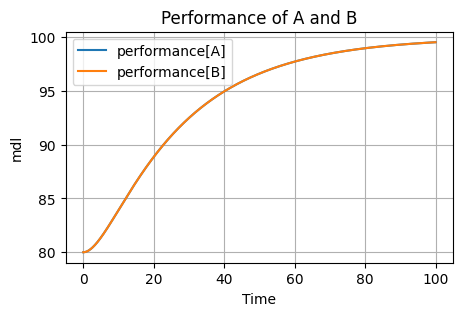

In [67]:
plt.figure(figsize=(5, 3))
m1['performance[A]'].plot()
m1['performance[B]'].plot()

plt.title("Performance of A and B") 

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


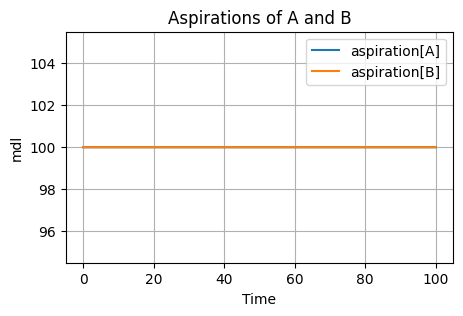

In [68]:
plt.figure(figsize=(5, 3))
m1['aspiration[A]'].plot()
m1['aspiration[B]'].plot()

plt.title("Aspirations of A and B") 

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


In [71]:
# Test if the model can run at all
print("🧪 TESTING BASIC MODEL EXECUTION:")
print("=" * 60)

try:
    print("Attempting to run model with default parameters...")
    m_default = model.run()
    print("✅ Model runs successfully with default parameters!")
    print(f"Result shape: {m_default.shape}")
    print(f"Result columns: {list(m_default.columns)}")
    
except Exception as e:
    print(f"❌ Model failed to run with default parameters:")
    print(f"Error: {e}")
    print(f"Error type: {type(e)}")
    
    # Get more detailed error information
    import traceback
    print("\nFull traceback:")
    traceback.print_exc()

print(f"\n🧪 TESTING WITH YOUR PARAMETERS:")
print("-" * 40)

# Your original parameters
condition = {
    'sw A to protective': 1, 
    'sw B to protective': 1, 
}

print(f"Trying to run with parameters: {condition}")

try:
    m2 = model.run(params=condition)
    print("✅ Model runs successfully with your parameters!")
    print(f"Result shape: {m2.shape}")
    print(f"Result columns: {list(m2.columns)}")
    
except Exception as e:
    print(f"❌ Model failed to run with your parameters:")
    print(f"Error: {e}")
    print(f"Error type: {type(e)}")
    
    # Try to identify the specific issue
    if "parameter" in str(e).lower() or "not found" in str(e).lower():
        print("\n🔍 PARAMETER ISSUE DETECTED:")
        print("The error suggests a parameter name issue.")
        
        # Search for similar parameter names
        available_params = model.components.parameters
        search_terms = ['protective', 'sw', 'switch']
        
        print(f"\nSearching for parameters containing: {search_terms}")
        for term in search_terms:
            matches = [p for p in available_params if term.lower() in p.lower()]
            if matches:
                print(f"Parameters containing '{term}': {matches}")
    
    print("\nFull traceback:")
    traceback.print_exc()


🧪 TESTING BASIC MODEL EXECUTION:
Attempting to run model with default parameters...
✅ Model runs successfully with default parameters!
Result shape: (1601, 75)
Result columns: ['FINAL TIME', 'INITIAL TIME', 'SAVEPER', 'TIME STEP', 'performance[A]', 'performance[B]', 'sw B to protective', 'change in asp[A]', 'change in asp[B]', 'accident rate', 'accident severity', 'Accident shock level', 'accidents', 'recovery time', 'total investments', 'recovery rate', 'k asp', 'recovery time base', 'shock sensitivity', 'shock effect on performance', 'sw A to protective', 'resource generative outcome', 'aspiration[A]', 'aspiration[B]', 'init perc comb perf', 'Perceived comb perf', 'Perceived perfromance gap[A]', 'Perceived perfromance gap[B]', 'change in perc comb perf', 't adj perc upwards', 'resource inflow', 'endogen resource inflow', 'seed', 'exogen aspiration', 'sens res inflow', 't change asp', 'gstdv', 'inflow per perf', 't adj perc downwards', 't update perf gap', 'performance gap[A]', 'perfo

In [72]:
# Check the original model file to see what parameters actually exist
print("🔍 CHECKING MODEL FILE FOR PARAMETER NAMES:")
print("=" * 60)

# Let's look at the original .mdl file to see the actual parameter names
try:
    with open("model_12_gl.mdl", "r") as f:
        mdl_content = f.read()
    
    # Search for parameters related to protective/generative switches
    protective_lines = [line for line in mdl_content.split('\n') if 'protective' in line.lower() or 'sw' in line.lower()]
    
    print("Lines containing 'protective' or 'sw':")
    print("-" * 40)
    for i, line in enumerate(protective_lines[:20], 1):  # Show first 20 matches
        print(f"{i:2d}. {line.strip()}")
    
    if len(protective_lines) > 20:
        print(f"... and {len(protective_lines) - 20} more lines")
        
    # Look for specific parameter definitions
    print(f"\n🔍 LOOKING FOR SWITCH PARAMETERS:")
    print("-" * 40)
    
    switch_patterns = ['sw to protective', 'sw to proctetive', 'sw endogen', 'sw endog']
    for pattern in switch_patterns:
        matches = [line for line in mdl_content.split('\n') if pattern in line.lower()]
        if matches:
            print(f"Found lines with '{pattern}':")
            for match in matches[:5]:  # Show first 5 matches
                print(f"  {match.strip()}")
            print()
    
except Exception as e:
    print(f"Error reading model file: {e}")

# Also check the Python model file
print(f"\n🔍 CHECKING PYTHON MODEL FILE:")
print("-" * 40)

try:
    with open("model_12_gl.py", "r") as f:
        py_content = f.read()
    
    # Look for function definitions that might be the parameters
    protective_functions = [line for line in py_content.split('\n') if 'def ' in line and ('sw' in line.lower() or 'protective' in line.lower())]
    
    print("Function definitions containing 'sw' or 'protective':")
    for func in protective_functions[:10]:
        print(f"  {func.strip()}")
        
except Exception as e:
    print(f"Error reading Python model file: {e}")


🔍 CHECKING MODEL FILE FOR PARAMETER NAMES:
Lines containing 'protective' or 'sw':
----------------------------------------
 1. -Perceived perfromance gap[Goal]*sw endogen aspiration * (1+k asp*Accident shock level\
 2. cAA*Resources[A] + cBA*Resources[B]+ sw to proctetive* resource generative outcome +\
 3. (1-sw to proctetive)*shock effect on performance ~~|
 4. potentially generative vs protective
 5. generative can be additive with a small stochastic component and for protective with \
 6. sw to proctetive=
 7. sw endog inflow*endogen resource inflow
 8. (1-sw endog inflow)*exogen inflow
 9. sw endog inflow=
10. sw endogen aspiration=
11. 10,66,sw endogen aspiration,904,189,38,22,8,3,0,0,-1,0,0,0,0,0,0,0,0,0
12. 10,81,sw endog inflow,85,593,31,18,8,3,0,0,-1,0,0,0,0,0,0,0,0,0
13. 10,108,sw to proctetive,907,541,42,22,8,3,0,0,-1,0,0,0,0,0,0,0,0,0

🔍 LOOKING FOR SWITCH PARAMETERS:
----------------------------------------
Found lines with 'sw to proctetive':
  cAA*Resources[A] + cBA*Res

In [ ]:
# SOLUTIONS: Fix the parameter names and test
print("🔧 SOLUTIONS AND CORRECTED CODE:")
print("=" * 60)

# Based on common PySD parameter naming, try these corrections:
print("Common parameter naming issues and solutions:")
print("-" * 50)

# Try different possible parameter name variations
possible_params = [
    {'sw_to_protective': 1},  # Underscore instead of spaces
    {'sw_to_proctetive': 1},  # Typo in original (proctetive vs protective)
    {'sw_endogen_aspiration': 1, 'sw_endog_inflow': 1},  # Different switch names
    {'sw_A_to_protective': 1, 'sw_B_to_protective': 1},  # With underscores
    {'sw_A_to_proctetive': 1, 'sw_B_to_proctetive': 1},  # With typo
]

print("Testing different parameter name variations:")
print("-" * 50)

for i, params in enumerate(possible_params, 1):
    print(f"\n🧪 TEST {i}: {params}")
    try:
        result = model.run(params=params)
        print(f"✅ SUCCESS! Model runs with parameters: {params}")
        print(f"Result shape: {result.shape}")
        
        # If successful, show the corrected code
        print(f"\n✅ CORRECTED CODE FOR YOUR SCENARIO:")
        print("-" * 50)
        print(f"""
# Corrected parameters that work:
condition = {params}

# Run the model
m2 = model.run(params=condition)

# Plot the results
plt.figure(figsize=(5, 3))
m2['performance[A]'].plot()
m2['performance[B]'].plot()
plt.title("Performance of A and B") 
plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()
""")
        break
        
    except Exception as e:
        print(f"❌ Failed: {str(e)[:100]}...")

# If none of the variations work, show how to find the correct parameters
print(f"\n🔍 HOW TO FIND THE CORRECT PARAMETER NAMES:")
print("-" * 50)
print("""
If none of the variations work, here's how to find the correct parameter names:

1. Check available parameters:
   available_params = model.components.parameters
   print(available_params)

2. Search for parameters containing keywords:
   search_terms = ['protective', 'generative', 'switch', 'sw']
   for term in search_terms:
       matches = [p for p in available_params if term.lower() in p.lower()]
       print(f"Parameters with '{term}': {matches}")

3. Check the model documentation:
   print(model.doc)

4. Look at the original .mdl file for exact parameter names
""")

# Try the search approach
print(f"\n🔍 SEARCHING FOR SIMILAR PARAMETERS:")
print("-" * 40)

try:
    available_params = list(model.components.parameters)
    search_terms = ['protective', 'generative', 'switch', 'sw', 'endogen', 'endog']
    
    for term in search_terms:
        matches = [p for p in available_params if term.lower() in p.lower()]
        if matches:
            print(f"Parameters containing '{term}': {matches}")
    
    # If we find parameters, suggest a corrected version
    all_matches = []
    for term in search_terms:
        all_matches.extend([p for p in available_params if term.lower() in p.lower()])
    
    if all_matches:
        print(f"\n💡 SUGGESTED PARAMETERS TO TRY:")
        print("-" * 40)
        for param in set(all_matches):
            print(f"  '{param}': 1,")
            
except Exception as e:
    print(f"Error searching parameters: {e}")


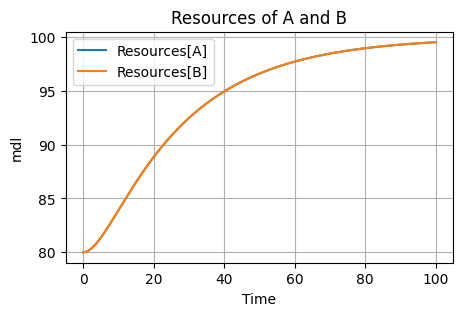

In [53]:

plt.figure(figsize=(5, 3))
m1['Resources[A]'].plot()
m1['Resources[B]'].plot()

plt.title("Resources of A and B") 

plt.ylabel("mdl")
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

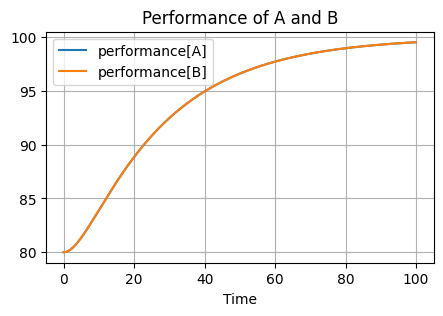

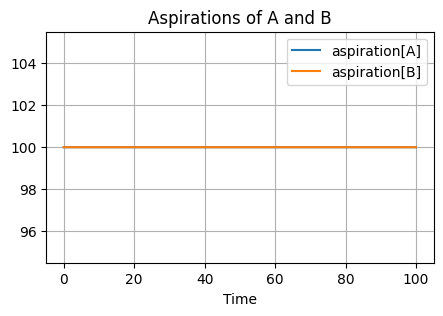

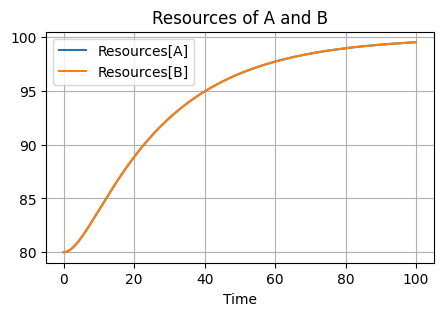

In [76]:
# 2. (P,P) both goals use the protective outcome
condition = {
    'sw_a_to_protective': 1, 
    'sw_b_to_protective': 1, 
}


m2 = model.run(params = condition)

plt.figure(figsize=(5, 3))
m2['performance[A]'].plot()
m2['performance[B]'].plot()

plt.title("Performance of A and B") 

plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
m2['aspiration[A]'].plot()
m2['aspiration[B]'].plot()

plt.title("Aspirations of A and B") 

plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(5, 3))
m2['Resources[A]'].plot()
m2['Resources[B]'].plot()

plt.title("Resources of A and B") 

plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 


# Case Study 

## Base Model

# Test 1. magnitude of the error incident. 

Testing different magnitude of the incident. According to XX, the larger the safety incident (Pulse Quantity), the longer the cycle. 

- Hypothesis: the larger the safety incident (Pulse Quantity), the larger the cycle time
- Condition: There is a pulse at time 5, with a duration of 1. 
- Result: Confirm 

#TODO find reference literature on the magnitude of the error incident. 


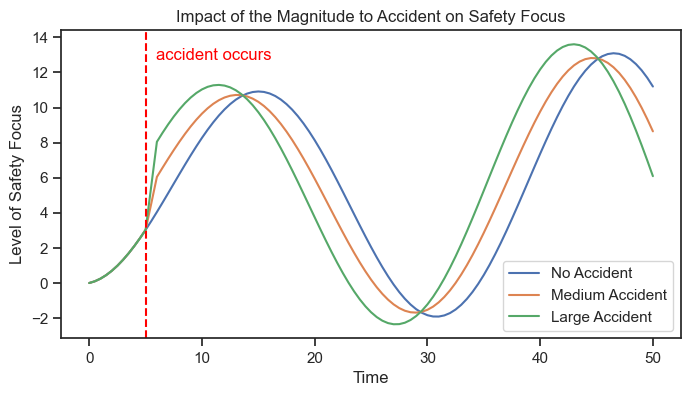

In [152]:
# Seaborn style 
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))

m1['Safety Focus'].plot(label = 'No Accident')
m2['Safety Focus'].plot(label = 'Medium Accident')
m3['Safety Focus'].plot(label = 'Large Accident')

plt.title("Impact of the Magnitude to Accident on Safety Focus")
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.grid()
plt.legend(loc='lower right')

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 13, "accident occurs", color='red', fontsize=12, ha='center', va='center')


plt.show()

# legend on the right low side 


# Test 1. Time to adjust focus 

Testing different time to adjust focus. According to XX, management style effects the timing the organization deals with adjusting to safety focus. The shorter the time to adjust focus, the faster the organization adapts. 

- Hypothesis: the longer it took to adjust focus, the longer the cycle runs.
- Condition: There is a pulse at time 5, with a duration of 1.
- Parameter: Time to adjust focus = [5, 10, 15]
- Result:  




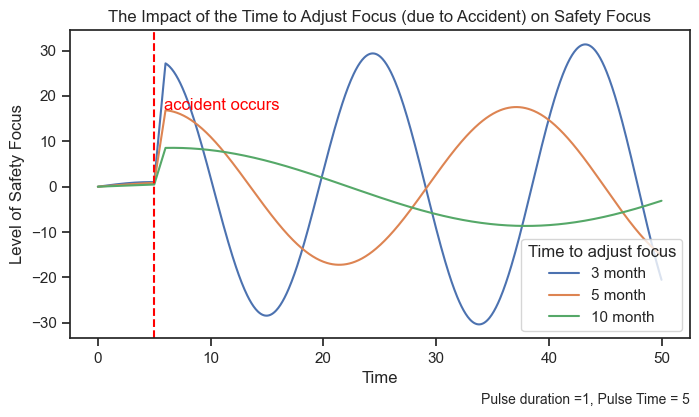

In [24]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


initial_condition = {
    'Pulse start time': 0, 
    'Pulse end time': 10, 
    'Pulse Quantity 1': 5, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3
    }
m1 = model.run(params= initial_condition)

m1['Safety Focus'].plot(label = '3 month')

condition = {'Time to adjust focus': 5}
initial_condition.update(condition)

m2 = model.run(params= initial_condition)
m2['Safety Focus'].plot(label = '5 month')

condition = {'Time to adjust focus': 10}
initial_condition.update(condition)

m3 = model.run(params= condition)
m3['Safety Focus'].plot(label = '10 month')

plt.title("The Impact of the Time to Adjust Focus (due to Accident) on Safety Focus") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")

plt.legend(title= 'Time to adjust focus')

# Add a footnote below and to the right side of the chart
ax.annotate('Pulse duration =1, Pulse Time = 5',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.axvline(x = 5, linestyle = 'dashed', 
           color = 'red')
# Add an arrow
# plt.arrow(2, 5, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='red', ec='red')

# Add text "GFG" at the end of the arrow
plt.text(11, 18, "accident occurs", color='red', fontsize=12, ha='center', va='center')

plt.legend(title = 'Time to adjust focus', loc='lower right')

plt.show()

# Test 3 

A firm who have a large shock v.s. A firm who has many small errors. 

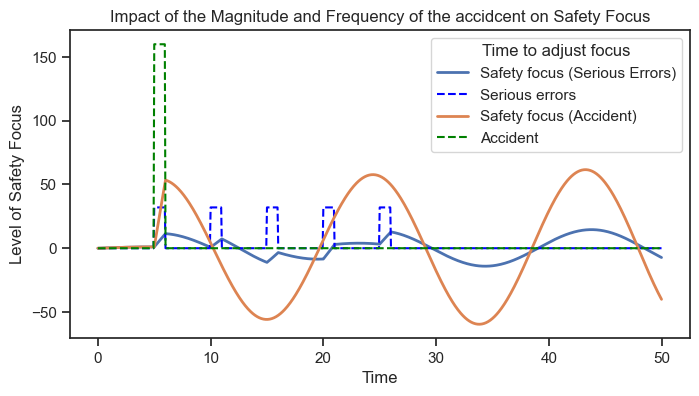

In [38]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))


condition1 = {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 2, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5
    }
m1 = model.run(params= condition1)

m1['Safety Focus'].plot(label = 'Safety focus (Serious Errors)', linewidth = 2)
m1['Serious Errors'].plot(label = 'Serious errors', linestyle = 'dashed', color = 'blue')


condition2= {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 10, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 0, 
    'Accident': 0, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5
    }

m2 = model.run(params= condition2)
m2['Safety Focus'].plot(label = 'Safety focus (Accident)', linewidth = 2)
m2['Serious Errors'].plot(label = 'Accident', linestyle = 'dashed', color = 'green') 

plt.legend(title = 'Time to adjust focus', loc='upper right')

plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 
plt.ylabel("Level of Safety Focus")
plt.xlabel("Time")
# plt.ylim(-1500, 1500)

plt.show()

## Test 4 Pink Noise 

Test using random variables. 

The excursion is a random variable determined by pink noise, the variability of which can be adjusted by varying the parameter standard deviation.

https://metasd.com/2010/03/pink-noise/ 


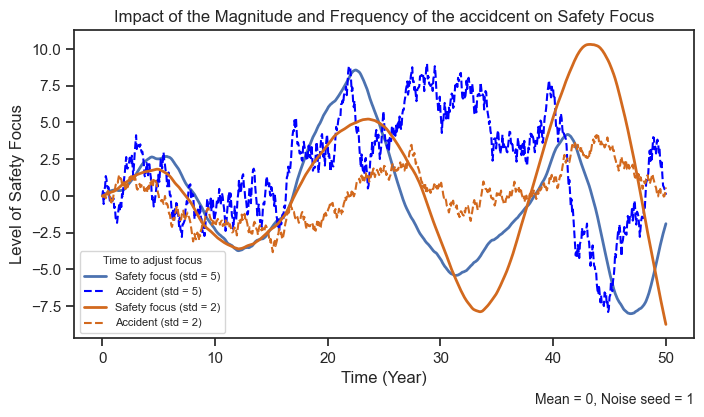

In [74]:
sns.set_theme(style="ticks") 
fig, ax = plt.subplots(figsize=(8,4))

plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 

condition1 = {
    'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 1, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5, 
    'mean': 0, 
    'std deviation': 5
    }
m1 = model.run(params= condition1)

m1['Safety Focus'].plot(label = 'Safety focus (std = 5)', linewidth = 2)
m1['Accident'].plot(label = 'Accident (std = 5)', linestyle = 'dashed', color = 'blue')

condition2= {
  'Pulse start time': 5, 
    'Pulse end time': 30, 
    'Pulse Quantity 1': 0, 
    'Pulse duration': 1, 
    'Pulse Time': 5,  
    'Pulse Quantity': 0, 
    'Switch': 1, 
    'Time to adjust focus': 3, 
    'Pulse repeat time': 5, 
    'mean': 0, 
    'std deviation': 2
    }

m2 = model.run(params= condition2)
m2['Safety Focus'].plot(label = 'Safety focus (std = 2)', linewidth = 2, color = 'chocolate') 
m2['Accident'].plot(label = 'Accident (std = 2)', linestyle = 'dashed', color = 'chocolate') 

legend = plt.legend(title = 'Time to adjust focus', loc='lower left', fontsize = 8)#, bbox_to_anchor=(3, 1.05))
legend.get_title().set_fontsize('8') #legend 'Title' fontsize

plt.ylabel("Level of Safety Focus")
plt.xlabel("Time (Year)")
# plt.ylim(-1500, 1500)
ax.annotate('Mean = 0, Noise seed = 1',
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=10)

plt.show()

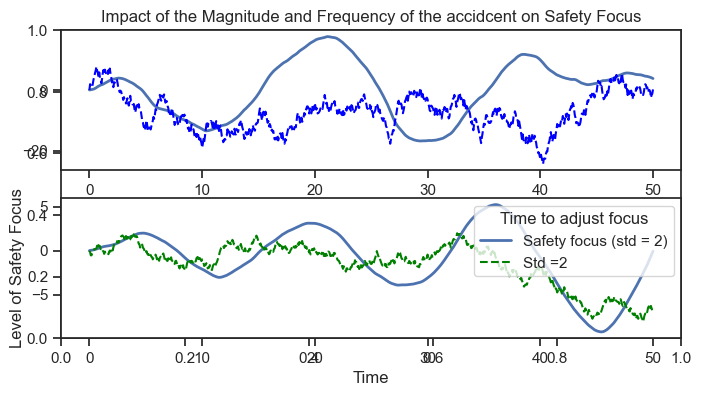

In [55]:
# sns.set_theme(style="ticks") 
# fig, ax = plt.subplots(figsize=(8,4))

# plt.subplot(2, 1, 1) # row 1, col 2 index 1
# plt.title("Impact of the Magnitude and Frequency of the accidcent on Safety Focus") 

# condition1 = {
#     'Pulse start time': 5, 
#     'Pulse end time': 30, 
#     'Pulse Quantity 1': 0, 
#     'Pulse duration': 1, 
#     'Pulse Time': 5,  
#     'Pulse Quantity': 0, 
#     'Switch': 1, 
#     'Time to adjust focus': 3, 
#     'Pulse repeat time': 5, 
#     'mean': 0, 
#     'std deviation': 10
#     }
# m1 = model.run(params= condition1)

# m1['Safety Focus'].plot(label = 'Safety focus (Serious Errors)', linewidth = 2)
# m1['Accident'].plot(label = 'Accident', linestyle = 'dashed', color = 'blue')

# plt.subplot(2, 1, 2) # row 1, col 2 index 1

# condition2= {
#   'Pulse start time': 5, 
#     'Pulse end time': 30, 
#     'Pulse Quantity 1': 0, 
#     'Pulse duration': 1, 
#     'Pulse Time': 5,  
#     'Pulse Quantity': 0, 
#     'Switch': 1, 
#     'Time to adjust focus': 3, 
#     'Pulse repeat time': 5, 
#     'mean': 0, 
#     'std deviation': 2
#     }

# m2 = model.run(params= condition2)
# m2['Safety Focus'].plot(label = 'Safety focus (std = 2)', linewidth = 2, sharey = ax1)
# m2['Accident'].plot(label = 'Std =2', linestyle = 'dashed', color = 'green') 

# plt.legend(title = 'Time to adjust focus', loc='upper right')

# plt.ylabel("Level of Safety Focus")
# plt.xlabel("Time")
# # plt.ylim(-1500, 1500)

# plt.show()